# Natural Language Processing Project

# Multi-Label Categorical Classification of English Quotes

<b>Rish (Rishabh) Kaushick</b> <br>
College of Engineering <br>
Northeastern University <br>
Toronto, ON <br>
kaushick.r@northeastern.edu

# Downloading The Dataset From Hugging Face

In [1]:
from huggingface_hub import hf_hub_download
import pandas as pd
import numpy as np

REPO_ID = "Abirate/english_quotes"
FILENAME = "quotes.jsonl"

# since the data is in jsonl format, we read it using read_json() function with lines=True
dataset = pd.read_json(hf_hub_download(repo_id=REPO_ID, filename=FILENAME, repo_type="dataset"), lines=True)


In [2]:
dataset

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,","[morality, philosophy]"
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,","[happiness, success]"
2505,"“In life, finding a voice is speaking and livi...",John Grisham,[inspirational-life]
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,"[comfort, home, winter]"


# Exploratory Data Analysis

In [3]:
dataset.head(10)

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"
5,"“Be who you are and say what you feel, because...",Bernard M. Baruch,"[ataraxy, be-yourself, confidence, fitting-in,..."
6,“You've gotta dance like there's nobody watchi...,William W. Purkey,"[dance, heaven, hurt, inspirational, life, lov..."
7,“You know you're in love when you can't fall a...,Dr. Seuss,"[dreams, love, reality, sleep]"
8,"“You only live once, but if you do it right, o...",Mae West,"[humor, life]"
9,“Be the change that you wish to see in the wor...,Mahatma Gandhi,"[action, change, inspirational, philosophy, wish]"


In [4]:
# setting random_state in the random sample, so that each time the same value is presented
dataset.sample(5, random_state=23)

,quote,author,tags
2062,"“Why are you worrying about YOU-KNOW-WHO, when...","J.K. Rowling,",[humor]
1078,"“I am not sure that I exist, actually. I am al...",Jorge Luis Borges,[life]
1176,"“If you're lonely when you're alone, you're in...",Jean-Paul Sartre,"[loneliness, solitude]"
414,“You educate a man; you educate a man. You edu...,Brigham Young,"[education, feminism, men, women]"
508,“There is neither happiness nor misery in the ...,Alexandre Dumas,"[hope, inspirational, wisdom]"


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   2508 non-null   object
 1   author  2508 non-null   object
 2   tags    2508 non-null   object
dtypes: object(3)
memory usage: 58.9+ KB


In [6]:
# Quotes by J.k. Rowling
dataset.loc[dataset['author'] == 'J.K. Rowling,']

,quote,author,tags
11,"“If you want to know what a man's like, take a...","J.K. Rowling,","[character, sirius-black]"
31,"“It is our choices, Harry, that show what we t...","J.K. Rowling,","[abilities, choices]"
35,“It does not do to dwell on dreams and forget ...,"J.K. Rowling,","[dreams, life]"
53,“I solemnly swear that I am up to no good.”,"J.K. Rowling,",[mischief]
68,“It takes a great deal of bravery to stand up ...,"J.K. Rowling,","[albus-dumbledore, courage, friends]"
...,...,...,...
2321,“Don't let the muggles get you down.”,"J.K. Rowling,","[encouragement, muggles, wit]"
2342,“I'm going to keep going until I succeed â€” o...,"J.K. Rowling,",[harry-potter]
2401,“You think the dead we loved ever truly leave ...,"J.K. Rowling,",[dead]
2472,"“Hello, Harry"" said George, beaming at him. ""W...","J.K. Rowling,",[humour]


## Exploring The Target Variable - 'tags'

In [7]:
# Understanding the 'tags' attribute:
dataset['tags']

0       [be-yourself, gilbert-perreira, honesty, inspi...
1       [best, life, love, mistakes, out-of-control, t...
2       [human-nature, humor, infinity, philosophy, sc...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                 [inspirational-life]
2506                              [comfort, home, winter]
2507      [just-listen, loud, owen, sara-dessen, silence]
Name: tags, Length: 2508, dtype: object

In [8]:
dataset['tags'][0]

['be-yourself',
 'gilbert-perreira',
 'honesty',
 'inspirational',
 'misattributed-oscar-wilde',
 'quote-investigator']

In [9]:
dataset['tags'][0][0]

'be-yourself'

In [10]:
dataset['tags'][0][3]

'inspirational'

From the above we can see that the values in the 'tags' attribute are stored as a list.

In [11]:
# Looking for how many unique values are present in the author column
len(dataset['author'].unique())

880

In [12]:
dataset['tags'].value_counts()

tags
[love]                                                                                                                                                                                                                          75
[inspirational]                                                                                                                                                                                                                 63
[humor]                                                                                                                                                                                                                         37
[life]                                                                                                                                                                                                                          34
[writing]                                                                              

The above does not help us much because one row could have multiple categories in the list. <br>
Therefore, in order to see how many unique tags are there, we might need to iterate through the entire pandas dataframe, and store them in a Python set.

In [13]:
# iterating through the values in the pandas dataframe
tags = dataset['tags']
print(tags)
print(type(tags))

0       [be-yourself, gilbert-perreira, honesty, inspi...
1       [best, life, love, mistakes, out-of-control, t...
2       [human-nature, humor, infinity, philosophy, sc...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                 [inspirational-life]
2506                              [comfort, home, winter]
2507      [just-listen, loud, owen, sara-dessen, silence]
Name: tags, Length: 2508, dtype: object
<class 'pandas.core.series.Series'>


In [14]:
# Iterting though the pandas Series object and adding each value in a Set
# The benefit of the set is that only the unique values will be added, therefore all duplicates will be removed
unique_tags = set()

# row_tags is the list of tags in each row
# we can see that sometimes a single row has multiple tags, therefore, we will nest another for loop inside which reads individual tags
for row_tags in tags:
    for tag in row_tags:
        unique_tags.add(tag)

print(unique_tags)

{'expression', 'music', 'lookingforalaska', 'detection', 'willful-ignorance', 'voter', 'funeral', 'misattributed-betty-white', 'earnestness', 'self-deprecation', 'young-adult-novels', 'youth', 'voting', 'december', 'road', 'inspiration', 'dimitri', 'reach-out', 'advocacy', 'wither', 'unfairness', 'sirius-black', 'true-love', 'alec-lightwood', 'run', 'stand', 'goals-in-life', 'mythology', 'limit', 'book', 'clock', 'difficult', 'rebels', 'security', 'hagrid', 'forests', 'misattributed-to-kant', 'timidity', 'bad-day', 'assumptions', 'calling', 'hate', 'robin-goodfellow', 'all-the-bright-places', 'sarah-dessen', 'action', 'stephen-chbosky', 'legacy', 'self-containment', 'misquote', 'humor-tattoo', 'real-love', 'communication', 'nationalism', 'power-of-words', 'censorship', 'foolproof', 'paramore', 'deep', 'sorry', 'incredibly', 'readers', 'angels', 'james-carstairs', 'science-of-mind', '2008', 'flexibility', 'viereck-interview', 'newspapers', 'limits', 'dissapointment', 'understand', 'phen

In [15]:
len(unique_tags)

2161

There are a total of 2,161 tags. This is too many if we want this to be our target variable.

In [16]:
# Let me create a Python dictionary to store the tag and it's corresponding frequency throughout this dataset.
tag_freq = {}

for row_tag in tags:
    for tag in row_tag:
        if tag in tag_freq:
            tag_freq[tag] += 1
        else:
            tag_freq[tag] = 1

print(tag_freq)

{'be-yourself': 16, 'gilbert-perreira': 1, 'honesty': 12, 'inspirational': 319, 'misattributed-oscar-wilde': 2, 'quote-investigator': 1, 'best': 1, 'life': 295, 'love': 327, 'mistakes': 10, 'out-of-control': 1, 'truth': 61, 'worst': 1, 'human-nature': 9, 'humor': 254, 'infinity': 4, 'philosophy': 60, 'science': 26, 'stupidity': 7, 'universe': 6, 'books': 141, 'simile': 8, 'soul': 12, 'ataraxy': 4, 'confidence': 11, 'fitting-in': 1, 'individuality': 21, 'misattributed-dr-seuss': 1, 'those-who-matter': 1, 'dance': 5, 'heaven': 2, 'hurt': 8, 'sing': 2, 'dreams': 31, 'reality': 17, 'sleep': 7, 'action': 7, 'change': 34, 'wish': 2, 'character': 11, 'sirius-black': 2, 'friends': 28, 'friendship': 63, 'misattributed-albert-camus': 1, 'lies': 12, 'lying': 6, 'memory': 9, 'friend': 3, 'knowledge': 17, 'enemies': 4, 'forgiveness': 10, 'strategy': 3, 'carpe-diem': 7, 'education': 22, 'learning': 15, 'darkness': 7, 'drive-out': 1, 'hate': 10, 'light': 11, 'peace': 14, 'music': 31, 'intelligence': 

In [17]:
# Let us sort the dictionary in descending order of the frequencies:
tag_freq_sorted = sorted(tag_freq.items(), key=lambda x:x[1], reverse=True)
print(tag_freq_sorted)

[('love', 327), ('inspirational', 319), ('life', 295), ('humor', 254), ('books', 141), ('inspiration', 87), ('reading', 86), ('happiness', 68), ('writing', 67), ('inspirational-quotes', 65), ('friendship', 63), ('wisdom', 62), ('truth', 61), ('philosophy', 60), ('optimism', 48), ('living', 48), ('life-quotes', 48), ('death', 47), ('hope', 46), ('poetry', 45), ('romance', 45), ('positive-affirmation', 41), ('positive-thinking', 41), ('women', 40), ('life-lessons', 40), ('optimistic', 40), ('positive', 40), ('positive-life', 40), ('inspire', 38), ('inspiring', 38), ('courage', 37), ('life-and-living', 36), ('change', 34), ('pain', 34), ('funny', 34), ('inspirational-life', 34), ('relationships', 33), ('religion', 32), ('dreams', 31), ('music', 31), ('fear', 31), ('jace-wayland', 29), ('friends', 28), ('strength', 28), ('freedom', 28), ('god', 28), ('inspirational-attitude', 28), ('motivational', 27), ('loneliness', 27), ('science', 26), ('beauty', 26), ('time', 25), ('motivation', 25), (

In [18]:
# printing the top 40 most frequent tags
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if i == 40:
        break


('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('books', 141)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirational-quotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('life-quotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('positive-affirmation', 41)
('positive-thinking', 41)
('women', 40)
('life-lessons', 40)
('optimistic', 40)
('positive', 40)
('positive-life', 40)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('life-and-living', 36)
('change', 34)
('pain', 34)
('funny', 34)
('inspirational-life', 34)
('relationships', 33)
('religion', 32)
('dreams', 31)
('music', 31)
('fear', 31)


From the above we can see two main issues with the tags as highlighted in blue and yellow:
1. We can see different columns which conceptually mean the same thing however it is written in different ways. For example, inspirational, inspiration, inspire and inspiring – all mean the same thing. However, it is classified as different tags. For fixing this issue, we must perform lemmatization on the target column.
2. We can see multiple different words separated by a hyphen. For example, positive-affirmation, life-lessons, etc. The hyphenated words must be handled by removing the ‘-‘ symbol. For example, ‘positive-thinking’ will be replaced with the tags positivethinking.

# Data Cleaning
## Handling Words That Contain a Hyphen

In [19]:
dataset['tags'][0]

['be-yourself',
 'gilbert-perreira',
 'honesty',
 'inspirational',
 'misattributed-oscar-wilde',
 'quote-investigator']

In [20]:
type(dataset['tags'][0][0])

str

In [21]:
# removing '-' from hyphenated words:
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        # in this loop we can go through individual tag elements
        if('-' in dataset['tags'][i][j]):
            # here the word contains a '-' character, therefore we can split the data
            # print(dataset['tags'][i][j])
            # new_split_strings = str(dataset['tags'][i][j]).split('-')
            dataset['tags'][i][j] = dataset['tags'][i][j].replace("-", "")
            # print(dataset['tags'][i])
            # print("This is the string: "),
            # print(new_split_strings)
        # print(dataset['tags'][i][j]),
    # print(dataset['tags'][i])
    # below code was written for testing and as a safety measure
    # if (i == 10):
    #     break
# print((dataset['tags'][0:11]))

In [22]:
dataset['tags']

0       [beyourself, gilbertperreira, honesty, inspira...
1       [best, life, love, mistakes, outofcontrol, tru...
2       [humannature, humor, infinity, philosophy, sci...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                  [inspirationallife]
2506                              [comfort, home, winter]
2507        [justlisten, loud, owen, saradessen, silence]
Name: tags, Length: 2508, dtype: object

In [23]:
# writing a function to calculate the count of tags and returning a list of tuples - [(tag, count of tag)]
def calculate_count_of_tags(tags=dataset['tags']):
    tag_count_dict = {}
    for row in tags:
        for tag in row:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    # now sorting it based on the highest values
    tag_freq_sorted = sorted(tag_count_dict.items(), key=lambda x:x[1], reverse=True)
    return tag_freq_sorted
    

In [24]:
tag_freq_sorted = calculate_count_of_tags(tags=dataset['tags'])

In [25]:
# looking at the top 40 most frequent tags:
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if(i==39):
        break

('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('books', 141)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirationalquotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('positiveaffirmation', 41)
('positivethinking', 41)
('women', 40)
('lifelessons', 40)
('optimistic', 40)
('positive', 40)
('positivelife', 40)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('lifeandliving', 36)
('change', 34)
('pain', 34)
('funny', 34)
('inspirationallife', 34)
('relationships', 33)
('religion', 32)
('dreams', 31)
('music', 31)


## Performing Lemmetization on Target Column

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# lemmetizing all tags
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        lemma = lemmatizer.lemmatize(dataset['tags'][i][j])
        dataset['tags'][i][j] = lemma
        # print(f"Actual word {dataset['tags'][i][j]}. Lemmatized word by default: {lemma}")
    # if(i==30):
    #     break

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
dataset['tags']

0       [beyourself, gilbertperreira, honesty, inspira...
1       [best, life, love, mistake, outofcontrol, trut...
2       [humannature, humor, infinity, philosophy, sci...
3                                           [book, humor]
4                                    [book, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                  [inspirationallife]
2506                              [comfort, home, winter]
2507        [justlisten, loud, owen, saradessen, silence]
Name: tags, Length: 2508, dtype: object

In [28]:
# running the count of tags again
tag_freq_sorted = calculate_count_of_tags()
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if(i==100):
        break

('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('book', 144)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirationalquotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)
('positiveaffirmation', 41)
('positivethinking', 41)
('lifelessons', 40)
('optimistic', 40)
('positive', 40)
('positivelife', 40)
('dream', 38)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('relationship', 36)
('lifeandliving', 36)
('change', 35)
('pain', 34)
('funny', 34)
('inspirationallife', 34)
('religion', 32)
('fear', 32)
('friend', 31)
('music', 31)
('jacewayland', 29)
('god', 29)
('strength', 28)
('freedom', 28)
('inspirationalattitude', 28)
('motivational', 27)
('loneliness', 27)
('science', 26)
('beauty', 26)
('time', 25)
('motivation', 25)
('success', 24)
('art', 23)
('claryfray', 23)
('education', 22)
('fait

However, we still can make it better. We can see some values which are similar like inspirational, inspiration, inspiring, and inspire. We can use the concept of stemming to further improve our target attribute - tags.

## Stemming on Target Column ('Tags')
### Selection of Stemming Algorithm

I decided to use and compare between Snowball and Lancaster Stemmer in this project for the following reasons:
- Snowball Stemmer is an improved version of Porter Stemmer.
- The Lancaster Stemmer has a higher chance of over-stemming (this phrase refers to those times when two different words lead to the same stem) due to its aggressive algorithm selection method in an iterative manner.

#### Snowball Stemmer

In [29]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer("english")

print("Using Snowball Stemmer: ")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = snowball_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Snowball Stemmer: 
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreira
Actual word honesty. Stemmed word : honesti
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : life
Actual word love. Stemmed word : love
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : truth
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : humannatur
Actual word humor. Stemmed word : humor
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosophi
Actual word science. Stemmed word : scienc
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed wor

#### Lancaster Stemmer

In [30]:
from nltk.stem import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
print("Using Lancaster Stemmer")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = lancaster_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Lancaster Stemmer
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreir
Actual word honesty. Stemmed word : honesty
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : lif
Actual word love. Stemmed word : lov
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : tru
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : human
Actual word humor. Stemmed word : hum
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosoph
Actual word science. Stemmed word : sci
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed word : book
Actual w

#### Porter Stemmer

In [31]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
print("Using Porter Stemmer")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = porter_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Porter Stemmer
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreira
Actual word honesty. Stemmed word : honesti
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : life
Actual word love. Stemmed word : love
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : truth
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : humannatur
Actual word humor. Stemmed word : humor
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosophi
Actual word science. Stemmed word : scienc
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed word : 

All 3 stemming approaches do not give out meaningful results in this case. Since our tags must be linguistically meaningful, we will not be performing stemming. 

## Cleaning ‘Tags’ Column Further
### Combining Similar Tags to 'Inspiring', 'Funny' or 'Sad'

In [32]:
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        if dataset['tags'][i][j].lower() == 'inspirational' or dataset['tags'][i][j].lower() == 'inspiration' or dataset['tags'][i][j].lower() == 'inspire' or dataset['tags'][i][j].lower() == 'inspirationalquotes':
            dataset['tags'][i][j] = 'inspiring'
        if dataset['tags'][i][j].lower() == 'humour' or dataset['tags'][i][j].lower() == 'humor':
            dataset['tags'][i][j] = 'funny'
        if dataset['tags'][i][j].lower() == 'depression':
            dataset['tags'][i][j] = 'sadness'
    # if(i==500):
    #     break

In [33]:
# running the count of tags again
print("The 20 most frequent tags are:")
top_20_tags = []
tag_freq_sorted = calculate_count_of_tags()
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    top_20_tags.append(tag_freq_sorted[i][0])
    if(i==19):
        break

The 20 most frequent tags are:
('inspiring', 547)
('love', 327)
('funny', 309)
('life', 295)
('book', 144)
('reading', 86)
('happiness', 68)
('writing', 67)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)


## Reducing Tags for a Simple Model

In [34]:
# cleaning the data and removing all the tags except for the 20 most frequent tags.

columns = ['quote', 'author', 'tags']
top_20_tags_df = pd.DataFrame(columns=columns)

for i in range(0, len(dataset)):
    # creating a set so that duplicates are removed
    tag_set = set(dataset['tags'][i])
    # since sets do not allow direct access to elements, resetting it to a list
    tag_list = list(tag_set)

    updated_tags = []
    # iterating through items in tag items
    for j in range(0, len(tag_list)):
        if (tag_list[j] in top_20_tags):
            # print(f'{tag_list[j]} is  in the list.')
            updated_tags.append(tag_list[j])
    
    # creating a new row
    # new_row = {'quote': dataset['quote'][i],
    #            'author': dataset['author'][i],
    #            'tags': updated_tags}
    # print(new_row)

    # adding the new row into the new dataframe (more efficient way of inserting items to df)
    top_20_tags_df.loc[len(top_20_tags_df)] = [dataset['quote'][i], dataset['author'][i], updated_tags]

    # for testing
    # if (i==15):
    #     break

In [35]:
top_20_tags_df

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,[inspiring]
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]"
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[philosophy, funny]"
3,"“So many books, so little time.”",Frank Zappa,"[funny, book]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book]
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,",[philosophy]
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,",[happiness]
2505,"“In life, finding a voice is speaking and livi...",John Grisham,[]
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,[]


We can see that there are many rows which have an empty list of tags. This is because those corresponding quotes do not belong to the top 20 categories. To handle these rows, I have decided to convert these rows with empty lists and replace it with a null value. This way later I can easily delete the rows which contain null values.

In [36]:
for i in range(0, len(top_20_tags_df)):
    if(len(top_20_tags_df['tags'][i]) == 0):
        # print(top_20_tags_df['tags'][i])
        top_20_tags_df['tags'][i] = np.nan
    # if(i==20):
    #     break

In [37]:
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 0 to 2507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   2508 non-null   object
 1   author  2508 non-null   object
 2   tags    1546 non-null   object
dtypes: object(3)
memory usage: 142.9+ KB


Notice that now there are a total of 1,546 rows which do not have a null value in the 'tags' attribute. Therefore, I will drop the rows which have null values and work on training the models only on the 1546 rows. 

In [38]:
top_20_tags_df.dropna(inplace=True)
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 0 to 2504
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   1546 non-null   object
 1   author  1546 non-null   object
 2   tags    1546 non-null   object
dtypes: object(3)
memory usage: 48.3+ KB


In [40]:
# resetting the index because it says:
# "Index: 1546 entries, 0 to 2504"
top_20_tags_df.reset_index(inplace=True)
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1546 non-null   int64 
 1   quote   1546 non-null   object
 2   author  1546 non-null   object
 3   tags    1546 non-null   object
dtypes: int64(1), object(3)
memory usage: 48.4+ KB


# Visualization

In [43]:
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
# visualizing the distribution of the different categories
tag_freq_sorted = calculate_count_of_tags(top_20_tags_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])

('inspiring', 360)
('love', 327)
('life', 295)
('funny', 292)
('book', 144)
('reading', 86)
('happiness', 68)
('writing', 67)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)


In [55]:
# plotting the above data in a histogram
px.histogram(tag_freq_sorted, x=0, y=1,labels={'0': 'quote tag', '1': 'tag frequency'})

In [56]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.7/168.7 kB 4.9 MB/s eta 0:00:00


(-0.5, 399.5, 199.5, -0.5)

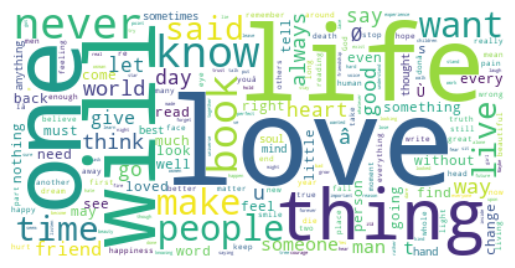

In [57]:
from wordcloud import WordCloud

# joining all the quotes together
all_quotes = ' '.join(top_20_tags_df['quote'])

# generating the word cloud for the quotes
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_quotes)

# plotting the generated word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

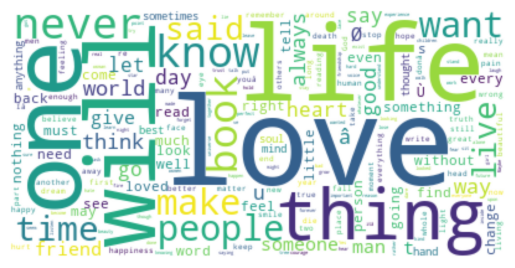

In [61]:
# plotting the generated word cloud using gaussian interpolation
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis("off")

From the above, we can see that ‘love’, ‘life’, ‘one’, ‘will’, and ‘thing’ are one of the most common words in our dataset.

# Data Cleaning & Model Preparation
## Tokenization, Normalization & Stop Word Removal
From the data we can see that there are some words which contain special characters like ‘Ø’. Therefore, while we tokenize words, we also need to consider normalizing the words to remove the accents.
<br><br>
For tokenizing the words, I decided to use RegexpTokenizer, because we can handle the tokens based on the regular expression parameter. Unlike word tokenizers, regular expression tokenizer can be able to understand and discard punctuation as well.
<br><br>
Furthermore, we must remove stop words like 'of', 'the', ‘and’ and 'to' which do not hold much meaning for the machine learning models.
<br><br>
For performing these 3 tasks, I have decided to write a python function.

In [62]:
type(top_20_tags_df['quote'])

pandas.core.series.Series

In [65]:
# importing the nltk libraries for tokenization, normalization and stop word removal
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
from nltk.corpus import stopwords

# downloading the punkt unsupervised model for tokenization & stop words list
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
def preprocess_text(dataframe=top_20_tags_df):
    result_df = pd.DataFrame(columns=['processed_quote'])

    # need to convert all text to lower case
    result_df['processed_quote'] = dataframe['quote'].str.lower()

    # regular expression will split words based on boundary-word-boundary
    regexp_tokenizer = RegexpTokenizer(r'\b\w+\b')

    for i in range (0, len(result_df['processed_quote'])):
        # performing regex tokenization - which will split tokens after each word
        tokens = regexp_tokenizer.tokenize(result_df['processed_quote'][i])

        # removing stop words
        tokens_wo_stop_words = [word for word in tokens if word not in stopwords.words('english')]

        normalized_sentence = ""
        for word in tokens_wo_stop_words:
            # normalization - removing accents by using unidecode - word by word
            # print(str(unidecode(word)))
            normalized_sentence += str(unidecode(word))+' '
        # once we have the entire sentence parsed, we assign it back
        # print(normalized_sentence)
        result_df['processed_quote'][i] = normalized_sentence
        
    return result_df


In [92]:
# Testing if this works
test_df = preprocess_text()
test_df['processed_quote']

0                            everyone else already taken 
1       selfish impatient little insecure make mistake...
2       two things infinite universe human stupidity s...
3                                 many books little time 
4              room without books like body without soul 
                              ...                        
1541                                            part met 
1542    sought hear voice god climbed topmost steeple ...
1543    stepping onto brand new path difficult difficu...
1544    morality simply attitude adopt towards people ...
1545    aim success aim make target going miss success...
Name: processed_quote, Length: 1546, dtype: object

Looks like this has worked, now adding this as a new attribute in the main dataframe object.

In [93]:
top_20_tags_df['processed_quote']= preprocess_text()
top_20_tags_df.head()

,index,quote,author,tags,processed_quote
0,0,“Be yourself; everyone else is already taken.”,Oscar Wilde,[inspiring],everyone else already taken
1,1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]",selfish impatient little insecure make mistake...
2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"[philosophy, funny]",two things infinite universe human stupidity s...
3,3,"“So many books, so little time.”",Frank Zappa,"[funny, book]",many books little time
4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book],room without books like body without soul


# Multi-Label Naive Bayes Classifier (Baseline Model)

# Recurrant Neural Network (RNN) Model

# Transformer Based Model?